# Исследование данных о российском кинопрокате



**Цель исследования** - изучить рынок российского кинопроката и выявить текущие тренды.

**Исходные данные** - данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Вопросы, интересующие заказчика:**
1. Сколько фильмов выходило в прокат каждый год?
2. Какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах? Как эта доля менялась по годам?
3. Как менялась динамика проката по годам? В каком году сумма сборов была минимальной? А максимальной?
4. Влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?
5. Какие закономерности можно выявить в данных у фильмов, заручившихся государственной поддержкой?

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
#импортируем библиотеки
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#откроем файл mkrf_movies
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
display(mkrf_movies.head())
#посмотрим информацию о датафрейме mkrf_movies
mkrf_movies.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
#откроем файл mkrf_movies
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
display(mkrf_shows.head())
#посмотрим информацию о датафрейме mkrf_shows
mkrf_shows.info()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Изучив общую информацию по двум датафреймам видим, что их можно объединить по общему столбцу "puNumber". Так как прокатные удостоверения числовые и уникальные данные, которые при объединении таблиц должны выступать как индекс, проверим на наличие посторонних строк, символов и прочего.

In [4]:
#проверяем наличие посторонних строк
mkrf_movies[mkrf_movies['puNumber'].str.isdigit() == False]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В столбце, как мы видим, содержатся два несоответствующих значения: "нет" - является строчным значением и может нам помешать при дальнейшем объединении, и "111004112" - можем преобразовать к числовому значению.

Преобразуем значения в число. В случае неудачи значение в ячейке будет заменено на Nan.

In [5]:
#заменим тип данных у несоответствующих значений
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')

Чтобы соединить датафреймы, необходимо, чтобы оба столбца имели одинаковый тип данных. Для этого приведем данные столбца puNumber датафрейма mkrf_shows к строковым значениям.

In [6]:
#преобразуем значения столбца puNumber в датафрейме mkrf_shows к строковому значению
mkrf_shows['puNumber'] = mkrf_shows['puNumber'].astype('object')

In [7]:
#объединим оба датафрейма
data_movies = mkrf_movies.merge(
    mkrf_shows,
    on='puNumber',
    how='outer'
)
data_movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,"221,048,915.00",2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,"111,013,716.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,"221,038,416.00",2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,"221,026,916.00",2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,"221,030,815.00",2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,"111,013,816.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,"111,007,013.00",2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,"221,074,614.00",2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,"121,011,416.00",2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,"111,019,114.00",2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Данные объединили, теперь посмотрим общую информацию по объединенным датафреймам.

In [8]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод:**
На данном этапе мы провели ознакомление с предоставленными нам данными. Обнаружили 2 посторонних значения. Произвели замену типа данных в столбце puNumber датасета mkrf_movies. По этому же столбцу и объединили наши датасеты.

В новом объединенном датафрейме data_movies наблюдаем 16 столбцов и 7486 строк. В столбцах puNumber, production_country, director, producer, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres и box_office наблюдаем пропуски. В столбцах show_start_date и ratings неверный тип данных, его необходимо перевести в формат datetime и float соответственно. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Как мы уже определили в предыдущем шаге, столбцы show_start_date и ratings имеют неверные форматы. Преобразуем эти столбцы в нужные форматы.

In [9]:
#преобразуем столбец show_start_date к формату datetime
data_movies['show_start_date'] = pd.to_datetime(data_movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Столбец ratings необходимо привести к формату float, т.к. рейтинг определяется по шкале от 0 до 10 и числа могут быть дробными.

Первоначально оценим все уникальные значения в столбце с рейтингом.

In [10]:
#проверим уникальные значения в столбце ratings
data_movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Изучив уникальные значения, наблюдаем некоторые несостыковки. Мы видим процентные значения и пропуски - Nan. 

Процентные значения отличаются от предполагаемых значений рейтинга. Т.к. значения рейтинга находятся в диапазоне от 0 до 10, то можно предположить, что процентные значения - это значения рейтинага в диапазоне от 0% до 100%. Соответственно, мы можем расчитать рейтинг в привычном формате без потери данных.

In [11]:
#уберем символ процента %
data_movies['ratings'] = data_movies['ratings'].str.replace('%', '')

In [12]:
#приведем столбец к формату float
data_movies['ratings'] = data_movies['ratings'].astype('float')

In [13]:
#приведем значения в столбце в диапазоне от 10 до 100 к привычному рейтингу
data_movies.loc[data_movies['ratings'] > 10, 'ratings'] = data_movies['ratings'] / 10

Что касается пропусков в данном столбце, можно предположить, что у данных фильмов нет рейтинга, в связи с тем, что он только вышел в прокат или данные попросту не указаны. Заменим пропуски на 0. На полное представление данных это не повлияет.

In [14]:
#заменим пропуски в столбце ratings
data_movies['ratings'] = data_movies['ratings'].fillna(value=0)

**Вывод:** Проверяя типы данных мы обнаружили, что в столбцах show_start_date и ratings типы данных не совпадают с ожидаемыми. Столбец show_start_date привели к типу данных datetime. В столбце со значениями рейтинга ситуация обстояла сложнее: мы обнаружили пропуски, которые заменили на 0, т.к. предположительно это фильмы, которые только вышли в прокат, и процентные значения, где мы брали обозначение процента "%", заменили тип данных на float и поделили эти процентные числа на 10, чтобы привести их к ожидаемому формату.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Посмотрим количество пропусков в каждой строке.

In [16]:
#смотрим количество пропусков
data_movies.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                     0
genres                    976
box_office               4328
dtype: int64

Можно обратить внимание, что в столбцах puNumber, film_studio, production_country, director, producer, refundable_support, nonrefundable_support, budget, financing_source и genres имеются пропуски в данных. Попробуем разобраться что с ними делать.

В столбце puNumber всего один пропуск, можем от него избавиться, на конечный результат исследования это не повлияет.

In [17]:
#убираем пропуск в столбце puNumber
data_movies = data_movies.dropna(subset=['puNumber'])

В столбце film_studio есть 18 пропусков. Т.к. студию-производителя не указали, можно заменить пропуски на "Студия не указана".

In [18]:
#заполняем пропуски в столбце film_studio
data_movies['film_studio'] = data_movies['film_studio'].fillna('Студия не указана')

В столбце production_country всего 2 пропуска. Мы можем предположить страну-производителя, но во избежание ошибки заменим пропуски на "Страна не указана".

In [19]:
#заполняем пропуски в столбце production_country
data_movies['production_country'] = data_movies['production_country'].fillna('Страна не указана')

В 9 случаях есть пропуски в столбце director. Чтобы не ошибиться, так же заполним пропуски на "Режиссер не указан".

In [20]:
#заполняем пропуски в столбце director
data_movies['director'] = data_movies['director'].fillna('Режиссер не указан')

Заполним 568 пропусков в столбце producer на "Продюсер не указан".

In [21]:
#заполняем пропуски в столбце director
data_movies['producer'] = data_movies['producer'].fillna('Продюсер не указан')

В столбцах refundable_support, nonrefundable_support и budget пропуски заменим на 0, т.к. это фильмы, которые не получили государственной финансовой поддержки и, предположительно, финансировались из других источников. Так же, вероятно, данные могли попросту не указать.

In [22]:
#заполняем пропуски в столбце refundable_support
data_movies['refundable_support'] = data_movies['refundable_support'].fillna(value=0)
#заполняем пропуски в столбце nonrefundable_support
data_movies['nonrefundable_support'] = data_movies['nonrefundable_support'].fillna(value=0)
#заполняем пропуски в столбце budget
data_movies['budget'] = data_movies['budget'].fillna(value=0)

В столбце financing_source на место пропущенных источников финансирования можем поставить "Иное", т.к. мы предполагаем, что это негосударственные источники.

In [23]:
#заполняем пропуски в столбце financing_source
data_movies['financing_source'] = data_movies['financing_source'].fillna('Иное')

В столбце genres заменим пропуски на "Жанр не указан".

In [24]:
#заполняем пропуски в столбце genres
data_movies['genres'] = data_movies['genres'].fillna('Жанр не указан')

В столбце box_office с данными по сборам пропуски заменим на 0, т.к. такие данные нам не откуда взять.

In [25]:
#заполняем пропуски в столбце box_office
data_movies['box_office'] = data_movies['box_office'].fillna(value=0)

Проверим наш датафрейм после заполнения пропусков.

In [26]:
data_movies.isna().sum()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

Все пропуски заполнены.

**Вывод:** Пропуски наблюдались в столбцах puNumber, film_studio, production_country, director, producer, refundable_support, nonrefundable_support, budget, financing_source и genres. В столбце puNumber мы отбросили строку с пропуском, т.к. он был всего 1 и на исследование это не повлияет. В столбцах film_studio, production_country, director, producer и genres пропуски были заменены на "Студия не указана", "Страна не указана", "Режиссер не указан", "Продюсер не указан", "Жанр не указан" соответственно. В столбцах refundable_support, nonrefundable_support и budget пропуски заменим на 0, т.к. это фильмы, которые не получили государственной финансовой поддержки и, предположительно, финансировались из других источников. В столбце financing_source на место пропущенных источников финансирования можем поставить "Иное", т.к. мы предполагаем, что это негосударственные источники. В столбце box_office заменили пропуски на 0, т.к. такими данными мы не обладаем, а большую часть данных из датафрейма удалять нецелесообразно. Эти данные, если они имеются, можно уточнить у сотрудников или уточнить причину их отсутствия.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим сколько идентичных строк есть в датафрейме.

In [27]:
data_movies.duplicated().sum()

0

Совпадений не наблюдается.

Предполагая, что фильмы могли быть задублированы, попробуем найти совпадения по названиям фильмов, дате их выхода, типу, студии, стране, режиссеру и продюссеру.

In [28]:
#выведем строчки с дубликатами
data_movies[data_movies.duplicated(subset=['title', 'show_start_date', 'type', 'film_studio', 'production_country', 'director'], keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1300,Эпидемия_,"121,025,713.00",2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,7.20,"драма,фантастика,триллер",0.00
1301,Эпидемия_,"221,035,513.00",2013-10-07 12:00:00+00:00,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,7.20,"драма,фантастика,триллер",0.00
1475,Оторвы,"121,006,514.00",2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,3.50,"комедия,приключения",0.00
1476,Оторвы,"221,013,214.00",2014-04-07 12:00:00+00:00,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,3.50,"комедия,приключения",0.00
2191,Последние пять лет.,"221,008,115.00",2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,5.70,"мюзикл,драма,мелодрама",0.00
2192,Последние пять лет.,"121,005,715.00",2015-03-25 12:00:00+00:00,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Рич...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,5.70,"мюзикл,драма,мелодрама","52,495.00"
2752,Пингвиненок Пороро: Большие гонки,"224,001,915.00",2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Иное,5.20,"мультфильм,семейный,спорт","1,360.00"
2753,Пингвиненок Пороро: Большие гонки,"124,001,915.00",2015-04-15 12:00:00+00:00,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, ...",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Иное,5.20,"мультфильм,семейный,спорт","14,152,495.90"
3086,Анархисты,"221,003,916.00",2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,5.70,драма,0.00
3087,Анархисты,"121,002,316.00",2016-02-03 12:00:00+00:00,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,5.70,драма,"332,371.00"


Нашли 8 полных дубликатов, но у всех этих фильмов разные прокатные удостоверения. Фильмы могут получать несколько прокатных удостоверений на разные способы использования фильма. В нашем случае появление дублей может быть связано с этим фактом, поэтому удалять мы их не будем.

Проверим наличие дубликатов по столбцу с прокатными удостоверениями.

In [29]:
#выведем строчки с дубликатами по столбцу puNumber
data_movies[data_movies['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,"221,154,310.00",2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,7.00,"мелодрама,комедия",0.00
4639,Иоанна - женщина на папском престоле /По роман...,"221,154,310.00",2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,7.60,"драма,мелодрама,история",0.00
5067,Анализируй это!,"221,054,410.00",2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,7.40,"комедия,криминал",0.00
5068,Анализируй то!,"221,054,410.00",2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Иное,6.80,"комедия,криминал",0.00


Видим, что фильмы "Как жениться и остаться холостым" и "Иоанна - женщина на папском престоле" имеют одинаковые номера прокатных удостоверений. Тоже самое происходит и с фильмами "Анализируй это!" и "Анализируй то!".

Посмотрим есть ли у фильма "Как жениться и остаться холостым" дубли.

In [30]:
data_movies[data_movies['title'] == 'Как жениться и остаться холостым']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4520,Как жениться и остаться холостым,"221,142,510.00",2010-12-03 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,7.00,"мелодрама,комедия",0.00
4638,Как жениться и остаться холостым,"221,154,310.00",2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,7.00,"мелодрама,комедия",0.00


Этот фильм появляется у нас 2 раза, но у него разные даты выпуска. Скорее всего фильм перезапускали. В связи с тем, чтобы у нас не дублировались номера прокатных удостоверений с фильмом "Иоанна - женщина на папском престоле", сделаем допущение и заменим номер прокатного удостоверения на свободный 100000000.

In [31]:
data_movies.loc[(data_movies['title'] == 'Как жениться и остаться холостым') & (data_movies['puNumber'] == 221154310), 'puNumber'] = 100000000

Посмотрим наличие дублей у одного из фильмов следующей пары.

In [32]:
data_movies[data_movies['title'] == 'Анализируй это!']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4553,Анализируй это!,"221,147,310.00",2010-12-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,7.40,"комедия,криминал",0.00
5067,Анализируй это!,"221,054,410.00",2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Иное,7.40,"комедия,криминал",0.00


Здесь наблюдаем такую же картину, поэтому также заменим номер удостоверения на свободный 100000001. 

In [33]:
data_movies.loc[(data_movies['title'] == 'Анализируй это!') & (data_movies['puNumber'] == 221054410), 'puNumber'] = 100000001

Снова проверим наличие дубликатов.

In [34]:
data_movies[data_movies['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Как видим - дубликаты обработаны.

**Вывод:** При поиске дубликатов, мы обнаружили 8 фильмов с одинаковыми названиями, но с разными прокатными удостоверениями. Удалять такие дубликаты мы не стали, т.к. фильмы могут получать несколько прокатных удостоверений для разного использования. Далее мы обнаружили 2 пары фльмов с одинаковыми номерами прокатных удостоверений, но разными названиями. Для обработки таких дублей у фильмов "Как жениться и остаться холостым." и "Анализируй это!" сделали допущение и заменили дублированные номера прокатных удостоверений на свободные. Номера прокатных удостоверений могли продублироваться в связи с тем, что фильм перезапускали, как в случае с фильмом "Как жениться и остаться холостым.", либо по ошибке, как в случае с фильмом "Анализируй это!". Данную информацию следует еще подробней уточнить у сотрудников.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Категоральные значения содержатся в столбцах с *типами фильмов (type)*, *возрасной категорией (age_restriction)*, *источниками государственного финансирования (financing_source)* и *жанрами фильмов (genres)*. Проверим их все.

**Проверяем столбец с типами фильмов type.**

In [35]:
#проверим солбец type на уникальные значения
data_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Видим, что есть одинаковые типы, но с разным написанием, а именно имеются пробелы в типа фильмов " Художественный" и " Анимационный". От таких пробелов необходимо избавиться.

In [36]:
#избавляемся от пробелов
data_movies['type'] = data_movies['type'].str.strip()

In [37]:
#проверим результат и выведем уникальные значения
data_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Как видим, пробелы были удалены. Теперь у нас 6 типов фильмов.

**Проверим столбец с возрастными категориями age_restriction.**

In [38]:
#проверим солбец age_restriction на уникальные значения
data_movies['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Одинаковых категорий нет. Все в порядке. Идем дальше.

**Проверим столбец с источниками государственного финансирования financing_source.**

In [39]:
#проверим солбец age_restriction на уникальные значения
data_movies['financing_source'].unique()

array(['Иное', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Тут у нас есть 3 источника госфинансирования: "Министерство культуры", "Фонд кино" и "Министерство культуры, Фонд кино". Источник "Иное" был ранее добавлен нами. Здесь у нас также нет одинаковых категорий. Идем дальше.

**Проверим столбец с жанрами фильмов genres.**

In [40]:
#проверим солбец genres на уникальные значения
data_movies['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'Жанр не указан', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
      

In [41]:
#посчитаем количество уникальных значений в столбце genres
data_movies['genres'].nunique()

743

В этом столбце наблюдаем очень большое количество жанров, в связи с тем, что большая часть - это несколько жанров, указанных в одной ячейке. 

**Вывод:** Общей проблемой во всех столбцах с категоральными значениям было большое количество пропусков, которые мы обрабтали в предыдущем шаге. В столбце type были найдены пробелы, которые мы впоследствие убрали, тем самым убрав неявные дубли значений. В столбце genres обратили внимание на большое количество ячеек с вариацией из нескольких жанров.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Посмотрим сводную статистику по датасету.

In [42]:
data_movies.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,485.00","7,485.00","7,485.00","7,485.00","7,485.00"
mean,"526,252.51","2,172,570.25","5,643,322.10",5.65,"32,267,163.99"
std,"5,781,491.10","16,149,994.78","47,531,308.14",2.41,"160,611,080.38"
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,5.40,0.00
50%,0.00,0.00,0.00,6.40,0.00
75%,0.00,0.00,0.00,7.20,"1,081,445.00"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


Из описания датасета можем наблюдать, что у нас есть нулевые медианные значения, при этом значения средней есть везде. Можем предположить, что это связано с тем, что очень много пропусков заменили на 0, и так же потому, что большая часть фильмов не имеет господдержку. Попробуем построить диаграммы размаха для каждого столбца без нулевых значений и посмотреть есть ли аномалии поближе. 

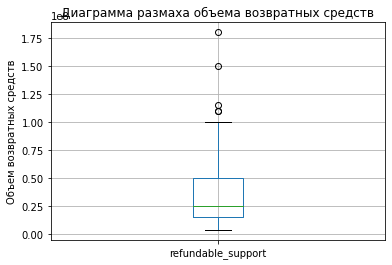

In [43]:
#построим диаграмму размаха для столбца refundable_support
data_movies.query('refundable_support != 0').boxplot(column=['refundable_support'])
plt.ylabel('Объем возвратных средств')
plt.title('Диаграмма размаха объема возвратных средств')
plt.show()

В случае с возвратными средствами "ящик с усами" показывает нам, что в размах попадают значения до 100 млн руб. Соответственно, значения, находящиеся за пределами размаха, можем принять за аномальные.

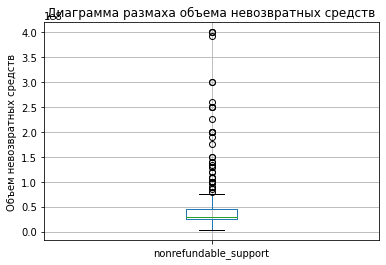

In [44]:
#построим диаграмму размаха для столбца nonrefundable_support
data_movies.query('nonrefundable_support != 0').boxplot(column=['nonrefundable_support'])
plt.ylabel('Объем невозвратных средств')
plt.title('Диаграмма размаха объема невозвратных средств')
plt.show()

В случае с невозвратными средствами видим, что аномальными можно признать значения выше 80 млн руб.

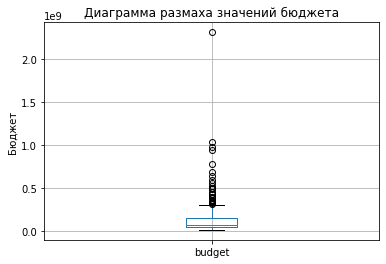

In [45]:
#построим диаграмму размаха для столбца budget
data_movies.query('budget != 0').boxplot(column=['budget'])
plt.ylabel('Бюджет')
plt.title('Диаграмма размаха значений бюджета')
plt.show()

Исходя из диаграммы размаха, аномальными можно признать значения бюджета выше 300 млн руб.

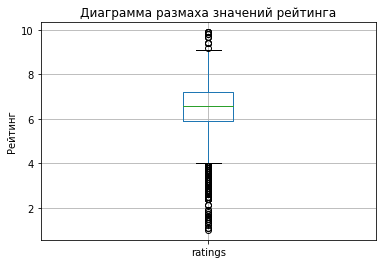

In [46]:
#построим диаграмму размаха для столбца ratings
data_movies.query('ratings != 0').boxplot(column=['ratings'])
plt.ylabel('Рейтинг')
plt.title('Диаграмма размаха значений рейтинга')
plt.show()

Значения рейтинга фильмов, исходя из диаграммы, находятся в пределах от 4.0 до примерно 9,2. Все остальные значения можно признать аномальными.

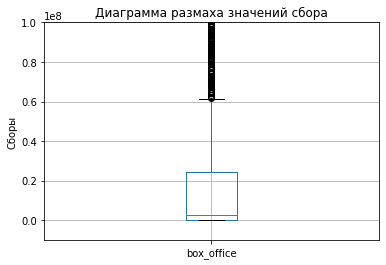

In [47]:
#построим диаграмму размаха для столбца box_office
data_movies.query('box_office != 0').boxplot(column=['box_office'])
plt.ylim(-10000000, 100000000)
plt.ylabel('Сборы')
plt.title('Диаграмма размаха значений сбора')
plt.show()

In [48]:
data_movies['box_office'].value_counts()

0.00              4351
200.00              13
300.00              12
360.00               9
400.00               8
                  ... 
9,585,014.00         1
809,638,458.60       1
220,728.00           1
11,332,412.00        1
52,984,377.00        1
Name: box_office, Length: 2938, dtype: int64

Диаграмма показывает нам, что распределение нормальных значений сборов находится в диапазоне от 200 руб до 61 млн руб. Все остальное, по данным диаграммы - аномалии. Также, посмотрев уникальные значения, видим, что есть очень маленькие значения сборов, такие как 200, 300, 400 рублей. Это вряд ли может быть правдой, как минимум потому, что это примерно равно цене за один билет на сеанс.

Общее, что можем сказать по аномалиям - это то, что во всех столбцах есть либо слишком большие, либо слишком малые значения. В столбце со сборами есть слишком маленькие нереальные значения, которые могут быть ошибкой в заполнении данных. В столбцах с возвратными, невозвратыми средствами, бюджетом и рейтингом все данные могут быть вполне реальными, просто иметь большой разброс.

Данные столбца *budget* указаны только для тех фильмов, которые получили государственную поддержку. Посмотрим как общий бюджет фильма *(budget)* соотносится с объёмом возвратных средств государственной поддержки *(refundable_support)* и объёмом невозвратных средств государственной поддержки *(nonrefundable_support)*.

Проверим, есть ли фильмы, получившие господдержку, но при этом не имеющие сборов.

In [49]:
data_movies.loc[(data_movies['refundable_support'] > 0) & (data_movies['nonrefundable_support'] > 0) & (data_movies['budget'] > 0) & (data_movies['box_office'] == 0)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7474,Вторжение,"111,022,519.00",2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",0.00
7478,(Не)идеальный мужчина,"111,023,119.00",2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,"40,000,000.00","60,000,000.00","150,147,502.00",Фонд кино,4.50,"комедия,фантастика,мелодрама",0.00


Такие фильмы в датафрейме присутствуют. Можем предположить, что эти 2 фильма только вышли в прокат на момент составления базы данных, либо данные попросту не были обновлены.

Проверим, есть ли фильмы, у которых бюджет меньше, чем сумма возвратных и невозвратных средств.

In [50]:
support_movies = data_movies.loc[(data_movies['refundable_support'] + data_movies['nonrefundable_support']) > data_movies['budget']]
support_movies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,"111,023,614.00",2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,"111,000,415.00",2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),"111,017,315.00",2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,"111,009,615.00",2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,"114,001,715.00",2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,"111,010,215.00",2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,"111,017,115.00",2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,"111,004,916.00",2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,"111,008,216.00",2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),"111,018,116.00",2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Наблюдаем, что у нас есть фильмы, у которых нет бюджета, но при этом они получили государственную поддержку. Можно предположить, что процент господдержки примерно одинаковый. Тогда мы можем вычислить медианный процент господдержки и заменить им нулевые значения бюджета у этих фильмов.

In [51]:
budget_pct = data_movies.eval('(refundable_support + nonrefundable_support) / budget').median()
budget_pct

0.6140376284219444

Медианный процент господдержки для фильмов составляет 61%. Заменим наши нулевые значения в бюджете.

In [52]:
data_movies.loc[support_movies.index, 'budget'] = round((data_movies.loc[support_movies.index, 'refundable_support'] + data_movies.loc[support_movies.index, 'nonrefundable_support']) / budget_pct)
data_movies.loc[support_movies.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,"111,023,614.00",2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","37,456,988.00","Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,"111,000,415.00",2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","122,142,352.00",Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),"111,017,315.00",2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","130,285,175.00",Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,"111,009,615.00",2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"32,571,294.00",Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,"114,001,715.00",2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","260,570,350.00",Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,"111,010,215.00",2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00","96,085,317.00",Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,"111,017,115.00",2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","56,999,764.00",Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,"111,004,916.00",2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","9,771,388.00",Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,"111,008,216.00",2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","113,999,528.00",Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),"111,018,116.00",2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","407,141,173.00",Фонд кино,5.60,фантастика,"1,038,321,489.00"


**Вывод:** В ходе изучения количественных значений нашли следующие особенности. 

Проверяя количественные столбцы на аномалии выявили, что в столбце со сборами есть слишком маленькие нереальные значения, которые могут быть ошибкой в заполнении данных. В столбцах с возвратными, невозвратными средствами, бюджетом и рейтингом все данные могут быть вполне реальными, просто иметь большой разброс.

Имеются 2 фильма с государственной поддержкой, но не имеющих сборов. Это могут быть фильмы, которые только вышли в прокат, либо данные об этих фильмах еще не обновлены. Так же нашли некоторое количество фильмов, у которых есть господдержка, но при этом бюджет у них 0. Эти данные мы заполнили, рассчитав медианный процент.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [53]:
#создадим столбец с годом проката
data_movies['show_start_year'] = data_movies['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Для того чтобы создать столбцы с именем главного режиссера и основным жанром, примем, что главный режиссер и основной жанр указаны первыми. Приступим к добавлению столбцов.

In [54]:
#создадим столбец с именем и фамилией главного режиссера
data_movies['main_director'] = data_movies['director'].apply(lambda x: x.split(',')[0])

In [55]:
#создадим столбец с основным жанром
data_movies['main_genre'] = data_movies['genres'].apply(lambda x: x.split(',')[0])

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Добавим столбец с долей господдержки индивидуально для каждого фильма.

In [56]:
#создадим столбец с долей господдержки
data_movies['gov_support_share'] = data_movies.eval('(refundable_support + nonrefundable_support) / budget').round(2)
data_movies['gov_support_share'].replace([np.nan], 0, inplace=True)

Проверим наличие новых столбцов.

In [57]:
data_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,gov_support_share
0,Открытый простор,"221,048,915.00",2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,Иное,7.20,"боевик,драма,мелодрама",0.00,2015,Кевин Костнер,боевик,0.00
1,Особо важное задание,"111,013,716.00",2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Продюсер не указан,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Иное,6.60,"драма,военный",0.00,2016,Е.Матвеев,драма,0.00
2,Особо опасен,"221,038,416.00",2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Иное,6.80,"фантастика,боевик,триллер",0.00,2016,Тимур Бекмамбетов,фантастика,0.00
3,Особо опасен,"221,026,916.00",2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Иное,6.80,"фантастика,боевик,триллер",0.00,2016,Тимур Бекмамбетов,фантастика,0.00
4,Особо опасен,"221,030,815.00",2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,Иное,6.80,"фантастика,боевик,триллер",0.00,2015,Тимур Бекмамбетов,фантастика,0.00


**Вывод:** Были добавлены новые столбцы. 

*show_start_year* - столбец с годом выхода фильма. 

*main_director* - столбец с именем и фамилией главного режиссера. Для создания этого столбца выделили первое имя в столбце director, предположив, что именно первое имя является главным. 

*main_genre* - столбец с названием главного жанра. Создавали столбец по тому же принципу, что и предыдущий.

*gov_support_share* - столбец с долей господдержки. Расчет доли произвели, сложив объем возвратных и невозвратных средств и, поделив сумму на общий бюджет. У тех фильмов, где доля равна 0% - господдержки не было.

**Вывод по разделу:** В ходе предобработки мы привели столбцы к необходимым типам данных, сделали замену пропусков, где это возможно.

При поиске дубликатов, мы обнаружили 8 фильмов с одинаковыми названиями, но с разными прокатными удостоверениями. Удалять такие дубликаты мы не стали, т.к. фильмы могут получать несколько прокатных удостоверений для разного использования. Далее мы обнаружили 2 пары фильмов с одинаковыми номерами прокатных удостоверений, но разными названиями. Для обработки таких дублей сделали допущение и заменили дублированные номера прокатных удостоверений на свободные. Номера прокатных удостоверений могли продублироваться в связи с тем, что фильм перезапускали, как в случае с фильмом "Как жениться и остаться холостым.", либо по ошибке, как в случае с фильмом "Анализируй это!". Данную информацию следует еще подробней уточнить у сотрудников.

Общей проблемой во всех столбцах с категоральными значениям было большое количество пропусков. В столбце type были найдены пробелы, которые мы впоследствии убрали, тем самым убрав неявные дубли значений. В столбце genres обратили внимание на большое количество ячеек с вариацией из нескольких жанров.

Проверяя количественные столбцы на аномалии, выявили, что в столбце со сборами есть слишком маленькие нереальные значения, которые могут быть ошибкой в заполнении данных. В столбцах с возвратными, невозвратными средствами, бюджетом и рейтингом все данные могут быть вполне реальными, просто иметь большой разброс.
Имеются 2 фильма с государственной поддержкой, но не имеющих сборов. Это могут быть фильмы, которые только вышли в прокат, либо данные об этих фильмах еще не обновлены. Так же нашли некоторое количество фильмов, у которых есть господдержка, но при этом бюджет у них 0. Эти данные мы заполнили, рассчитав медианный процент.

Были добавлены новые столбцы: столбец с годом выхода фильма, с именем и фамилией главного директора, названием главного жанра и долей господдержки.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Создадим таблицу, где будет указано количество фильмов за каждый год, количество фильмов, которые вышли в прокат и долю фильмов, вышедших в прокат за каждый год.

In [58]:
#создадим сводную таблицу с количеством фильмов за каждый год
all_movies = (
    data_movies.pivot_table(index='show_start_year', values='box_office', aggfunc='count')
    .reset_index()
)
#создадим сводную таблицу с количеством фильмов, вышедших в прокат, за каждый год
box_office_movies = (
    data_movies.query('box_office > 0')
    .pivot_table(index='show_start_year', values='box_office', aggfunc='count')
    .reset_index()
)
#объединим созданные таблицы
data_movies_pivot = all_movies.merge(box_office_movies, on='show_start_year', how='outer')
#поменяем названия столбцов
data_movies_pivot.columns = ['Год', 'Фильмов за год', 'Вышло в прокат']
#создадим новый столбец с долей проката
data_movies_pivot['Процент проката'] = round((data_movies_pivot['Вышло в прокат'] / data_movies_pivot['Фильмов за год']) * 100, 2)
data_movies_pivot

,Год,Фильмов за год,Вышло в прокат,Процент проката
0,2010,985,101,10.25
1,2011,622,109,17.52
2,2012,593,123,20.74
3,2013,630,179,28.41
4,2014,806,273,33.87
5,2015,705,462,65.53
6,2016,818,525,64.18
7,2017,505,357,70.69
8,2018,891,475,53.31
9,2019,930,530,56.99


Посмотрим сколько фильмов выходило в прокат каждый год.

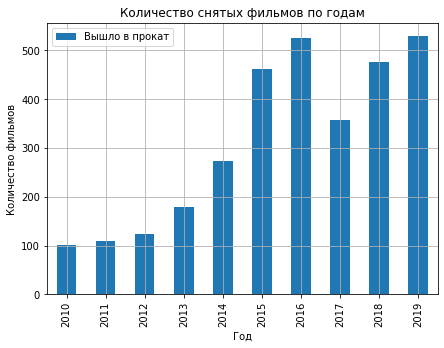

In [59]:
#построим столбчатую диаграмму с количеством прокатных фильмов за каждый год
data_movies_pivot.plot(y='Вышло в прокат', x='Год', kind='bar', grid=True, figsize=(7,5))
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.title('Количество снятых фильмов по годам')
plt.show()

**Вывод:** На диаграмме видим, что с 2010 по 2016 годы количество вышедших в прокат фильмов увеличивалось. В 2017 году произошел резкий спад. В 2019 году количество фильмов, вышедших в прокат, вернулось на прежний уровень 2016 года. Возможно, что резкий спад выхода фильмов в прокат был связан с новой реформой Министерства Культуры, которая предусматривает увеличение платы за выход фильмов в прокат и создание комиссии, которая решает, какие фильмы от этого взноса освободить.

Посмотрим как менялась доля фильмов с информацией о прокате по годам.

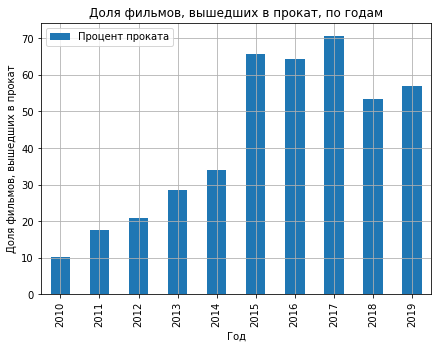

In [60]:
#построим столбчатую диаграмму с долей прокатных фильмов за каждый год
data_movies_pivot.plot(y='Процент проката', x='Год', kind='bar', grid=True, figsize=(7,5))
plt.ylabel('Доля фильмов, вышедших в прокат')
plt.xlabel('Год')
plt.title('Доля фильмов, вышедших в прокат, по годам')
plt.show()

**Вывод:** Доля фильмов с информацией о выходе в прокат плавно увеличивалась с 2010 по 2014 годы, достигла своих пиков в 2015-2017 годах и немного снизилась с 2018 года. Можем предположить, что пики в 2015-2017 годах связаны с более качественными по содержанию кинопремьерами, которые допущены к прокату. Также это может быть связано с так называемым прорывом в российском кинематографе, что следует из многих статей. Спад в 2018-2019 годах может быть опять же связан с реформой 2017 года, описанной нами выше.

Полнее всего в данных представлен период с 2015 по 2019 года.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Посмотрим динамику проката по годам, построив график по суммам сборов. Далее посмотрим в каком году сумма сборов была минимальной, а в каком - максимальной.

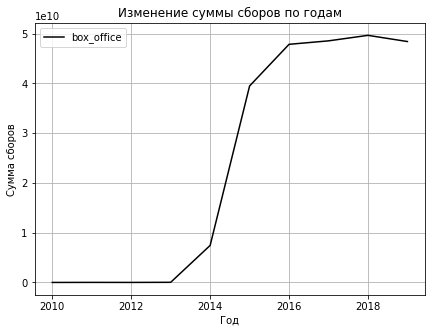

In [61]:
#строим график по суммам сборов
(
    data_movies.query('box_office != 0')
               .pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
               .plot(style='-0', grid=True, figsize=(7,5))
)
plt.ylabel('Сумма сборов')
plt.xlabel('Год')
plt.title('Изменение суммы сборов по годам')
plt.show()

In [62]:
#найдем год с минимальной суммой сборов
data_movies.query('box_office != 0').pivot_table(index='show_start_year', values='box_office', aggfunc='sum').idxmin()

box_office    2010
dtype: int64

In [63]:
#найдем год с максимальной суммой сборов
data_movies.query('box_office != 0').pivot_table(index='show_start_year', values='box_office', aggfunc='sum').idxmax()

box_office    2018
dtype: int64

**Вывод:** Сумма сборов начала резко увеличиваться с 2013 года, с 2016 года была примерно на одном уровне. Тем не менее минимальная сумма сборов зафиксирована в 2010 году, а максимальная в 2018 году. Это может быть связано с улучшением качества выпускаемых кинокартин.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

С помощью сводной таблицы произведем рассчет среднего и медианного значения по сумме сборов. Для наглядности построим график.

In [64]:
#сделаем сводную таблицу со средней и медианой по сборам
pivot_mean_median = ( 
    data_movies.query('box_office > 0')
    .pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])
    .reset_index()
    .round(1)
)
#поменяем названия столбцов
pivot_mean_median.columns = ['Год', 'Средняя сборов', 'Медиана сборов']
pivot_mean_median

,Год,Средняя сборов,Медиана сборов
0,2010,"24,046.10","1,710.00"
1,2011,"129,383.20","3,000.00"
2,2012,"56,548.20","6,220.00"
3,2013,"166,478.80","3,580.00"
4,2014,"27,270,885.90","20,400.00"
5,2015,"85,492,132.50","5,003,450.20"
6,2016,"91,173,904.30","3,915,041.00"
7,2017,"136,032,793.30","9,968,340.00"
8,2018,"104,565,059.20","8,891,102.20"
9,2019,"91,369,261.80","4,627,798.30"


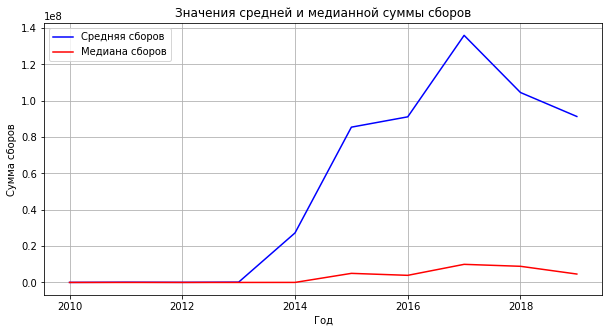

In [65]:
#построим график со среднейи медианой по сборам
pivot_mean_median.plot(x='Год', y=['Средняя сборов', 'Медиана сборов'], style='-0', color=['blue', 'red'], grid=True, figsize=(10,5))
plt.ylabel('Сумма сборов')
plt.xlabel('Год')
plt.title('Значения средней и медианной суммы сборов')
plt.show()

**Вывод:** С 2010 по 2019 год динамика по сборам сохранялась примерно на одном уровне, что видно по медиане. Среднее значение с 2013 года резко увеличивается, достигает своего максимума в 2017 году и дальше снижается к 2019 году. Из данных графика можем отметить, что средняя сумма сборов намного больше, чем медианная. Это может говорить о том, что сумма сборов большей части фильмов невысокая, но также есть фильмы, которые были достаточно популярны у зрителей и принесли достаточно хорошую долю от проката.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Сократим строку в столбце с возрастной категорией до значения возраста в кавычках.

In [66]:
#создадим столбец со значениями возраста
data_movies['age'] = data_movies['age_restriction'].apply(lambda x: x.split('-')[0])

Посмотрим, влияет ли возрастное ограничение на сборы фильма в прокате в период с 2015 по 2019 годы.

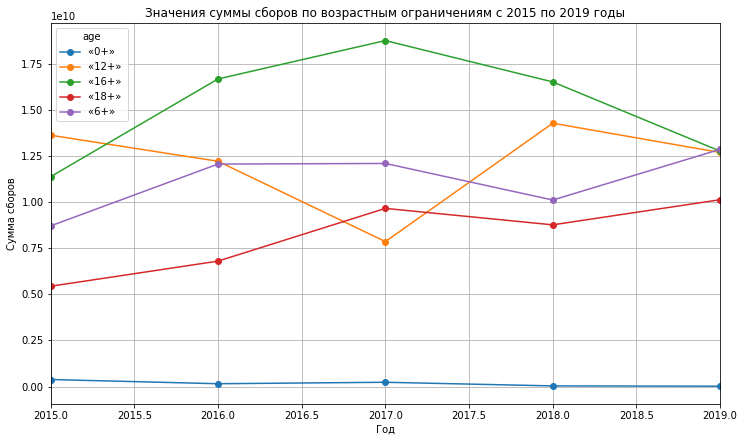

In [67]:
#создадим сводную таблицу по сборам с возрастными ограничениями
data_movies_age = (
    data_movies.query('box_office > 0')
    .pivot_table(index='show_start_year', columns='age', values='box_office', aggfunc='sum')
    .round()
)
#построим графики сборов по возрастным ограничениям с 2015 по 2019 годы
data_movies_age.plot(style='o-', xlim=[2015, 2019], figsize=(12, 7), grid=True)
plt.ylabel('Сумма сборов')
plt.xlabel('Год')
plt.title('Значения суммы сборов по возрастным ограничениям с 2015 по 2019 годы')
plt.show()

**Вывод:** В 2015 году лидерство по сборам было у фильмов "12+". К 2017 году лидерство перешло к фильмам "16+". В это время фильмы "12+" достигли своего минимума, это может быть связано с пересыщением ими рынка. Фильмы "6+" и "18+" с 2015 по 2019 годы имели одинаковую динамику, при этом фильмы "6+" имели большие сборы. к 2019 году фильмы "16+", "12+" и "6+" сравнялись по сумме сборов, фильмы "18+" расположились немного ниже. Все это время фильмы категории "0+" имели достаточно низкую сумму сборов и были в аутсайдерах. Получилось очень интересное распределение. Самый большой интерес у зрителей вызывали фильмы "16+", а самый низкий - фильмы "0+". Можем предположить, что это может быть связано с количеством фильмов, снятых по каждой категории.

**Вывод по разделу:**
С 2010 по 2016 годы количество вышедших в прокат фильмов увеличивалось. В 2017 году произошел резкий спад. В 2019 году количество фильмов, вышедших в прокат, вернулось на прежний уровень 2016 года. Возможно, что резкий спад выхода фильмов в прокат был связан с новой реформой Министерства Культуры, которая предусматривает увеличение платы за выход фильмов в прокат и создание комиссии, которая решает, какие фильмы от этого взноса освободить.

Доля фильмов с информацией о выходе в прокат плавно увеличивалась с 2010 по 2014 годы, достигла своих пиков в 2015-2017 годах и немного снизилась с 2018 года. Можем предположить, что пики в 2015-2017 годах связаны с более качественными по содержанию кинопремьерами, которые допущены к прокату. Также это может быть связано с так называемым прорывом в российском кинематографе, что следует из многих статей. Спад в 2018-2019 годах может быть опять же связан с реформой 2017 года, описанной нами выше.
Полнее всего в данных представлен период с 2015 по 2019 года.

Сумма сборов начала резко увеличиваться с 2013 года, с 2016 года была примерно на одном уровне. Тем не менее минимальная сумма сборов зафиксирована в 2010 году, а максимальная в 2018 году. Это может быть связано с улучшением качества выпускаемых кинокартин.

Средняя сумма сборов намного больше, чем медианная. Это может говорить о том, что сумма сборов большей части фильмов невысокая, но также есть фильмы, которые были достаточно популярны у зрителей и принесли достаточно хорошую долю от проката.

В 2015 году лидерство по сборам было у фильмов "12+". К 2017 году лидерство перешло к фильмам "16+". В это время фильмы "12+" достигли своего минимума, это может быть связано с пересыщением ими рынка. Фильмы "6+" и "18+" с 2015 по 2019 годы имели одинаковую динамику, при этом фильмы "6+" имели большие сборы. к 2019 году фильмы "16+", "12+" и "6+" сравнялись по сумме сборов, фильмы "18+" расположились немного ниже. Все это время фильмы категории "0+" имели достаточно низкую сумму сборов и были в аутсайдерах. Получилось очень интересное распределение. Самый большой интерес у зрителей вызывали фильмы "16+", а самый низкий - фильмы "0+". Можем предположить, что это может быть связано с количеством фильмов, снятых по каждой категории.


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для исследования фильмов, получивших господдержку, для начала выведем только те фильмы, которые ее получили.

In [68]:
gov_support_movies = data_movies.query('budget != 0')
gov_support_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,gov_support_share,age
1281,Пока еще жива,"111,005,313.00",2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,0.33,«16+»
1448,Бесславные придурки,"111,003,314.00",2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,0.00,Жанр не указан,"28,140.00",2014,А.Якимчук,Жанр не указан,0.70,«12+»
1498,Невидимки,"111,004,213.00",2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61,«12+»
1524,БЕРЦЫ,"111,004,314.00",2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,«16+»
1792,Братья Ч,"111,004,414.00",2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,0.62,«16+»


**Посмотрим, сколько суммарно выделяют государственного финансирования разные источники по годам.**

In [69]:
#построим сводную таблицу
gov_support_movies.pivot_table(index='show_start_year', columns='financing_source', values='budget', aggfunc='sum', margins=True)

financing_source,Министерство культуры,"Министерство культуры, Фонд кино",Фонд кино,All
show_start_year,,,,
2013,"79,411,900.00",NaN,"176,023,490.00","255,435,390.00"
2014,"355,098,330.00","390,955,947.00","570,887,494.00","1,316,941,771.00"
2015,"2,058,659,139.00","1,083,732,355.00","4,865,931,965.00","8,008,323,459.00"
2016,"1,693,321,763.00","701,425,062.00","5,365,108,012.00","7,759,854,837.00"
2017,"810,792,850.00","108,653,233.00","6,191,154,484.00","7,110,600,567.00"
2018,"2,244,609,772.00","130,000,000.00","4,845,404,210.00","7,220,013,982.00"
2019,"4,237,081,392.00","249,000,000.00","8,349,926,861.00","12,836,008,253.00"
All,"11,478,975,146.00","2,663,766,597.00","30,364,436,516.00","44,507,178,259.00"


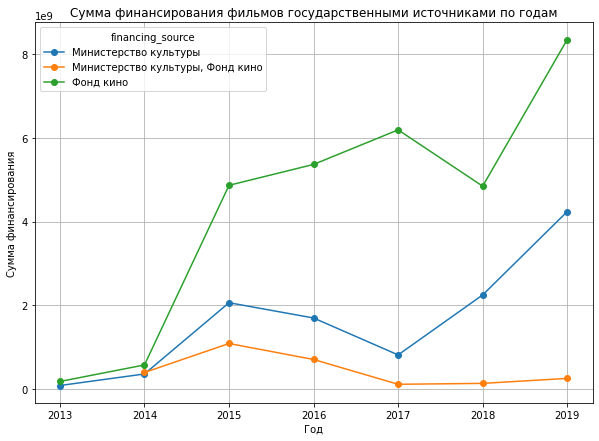

In [70]:
#построим график для наглядности
(
    gov_support_movies.pivot_table(index='show_start_year', columns='financing_source', values='budget', aggfunc='sum')
                      .plot(style='o-', grid=True, figsize=(10,7))
)
plt.ylabel('Сумма финансирования')
plt.xlabel('Год')
plt.title('Сумма финансирования фильмов государственными источниками по годам')
plt.show()

**Вывод:** Мы имеем 3 источника госфинансирования фильмов: Министерство Культуры, Фонд кино и совместное финансирование - Министерство Культуры + Фонд кино. Видим, что фильмы, представленные в нашем датафрейме, получали господдержку с 2013 года и с каждым годом поддержка статистически увеличивалась. Лидером по госфинансированию является Фонд кино, Министерство культуры идет на 2 месте, общее финансирование - меньше всего. Финансирование Министерством культуры и общее снизилось в 2017 году и потом к 2019 году выросло вновь. Финансирование Фондом кино было как раз достаточно высоким, а к 2018 неким образом снизилось, но уже к 2019 году достигло своего пика. Динамика совместного финансирования Министерства Культуры с Фондом кино оставалось на низком уровне, с 2013 по 2015 года увеличивалось, в 2015 году достигла пика и к 2017 резко снизилось, далее незначительно увеличилось к 2019 году.

Увеличение с годами госфинансирования кинематографа связано с высоким уровнем поддержки государства, благодаря введенным Президентом РФ законам о поддержке кинематографа. В 2017 году снижение финансирования Министерством культуры может быть связано с проведенной Министерством реформой и ужесточением требований к получению финансирования, возможно в связи с этим увеличилась поддрежка сос тороны Фонда кино.

В общей сложности в период с 2013 по 2019 годы Министерством культуры было выделенио почти 11,5 млрд рублей, Фондом кино - почти 30,4 млрд рублей, совместное финансирование - почти 2,7 млрд рублей, в качестве господдержки фильмов. Суммарно государственное финансирование кинематографа с 2013 по 2019 годы составило 44,5 млрд рублей.

**Попробуем найти количество фильмов, которые окупились, и фильмов, которые не окупились. И рассчитаем процент окупаемости.**

In [71]:
#посчитаем количество фильмов, которые окупились
paid_off_movies = len(gov_support_movies.query('box_office > budget'))
print('Количество фильмов, которые окупились:', paid_off_movies)

Количество фильмов, которые окупились: 73


In [72]:
#посчитаем количество фильмов, которые не окупились
not_paid_off_movies = len(gov_support_movies.query('box_office < budget'))
print('Количество фильмов, которые не окупились:', not_paid_off_movies)

Количество фильмов, которые не окупились: 259


In [73]:
#посчтаем процент окупаемости
pay_off_share = round((paid_off_movies / len(gov_support_movies)) * 100)
print('Окупаемость фильмов', pay_off_share, '%')

Окупаемость фильмов 22 %


**Вывод:** Из 332 фильмов, заручившихся госфинансированием, окупились 73, а не окупились - 259. В общем итоге, окупаемость таких фильмов составляет 22%. Что не такая уж большая цифра для потраченного на финансирование бюджета.

**Посмотрим, на какие жанры фильмов государство выделило больше и меньше всего финансирования, и какое количество фильмов было снято в каждом жанре.**

In [74]:
genre_budget = (
    gov_support_movies.query('main_genre != "Жанр не указан"')
                      .pivot_table(index='main_genre', values='budget', aggfunc=['sum', 'count'])
                      .reset_index()
)
genre_budget.columns = ['Жанр', 'Бюджет', 'Количество фильмов']
genre_budget.sort_values(by='Бюджет', ascending=False) 

,Жанр,Бюджет,Количество фильмов
5,драма,"11,174,029,040.00",93
7,комедия,"6,298,299,582.00",74
10,мультфильм,"6,148,638,752.00",31
12,приключения,"3,374,742,189.00",7
18,фантастика,"2,600,241,988.00",11
19,фэнтези,"2,340,123,765.00",11
6,история,"2,145,062,206.00",4
16,триллер,"1,388,674,821.00",15
2,военный,"1,285,906,825.00",9
3,детектив,"1,198,222,297.00",5


**Вывод:** Больше всего финансирования было выделено для фильмов с жанре "драма", при этом за весь период исследования их было снято больше всего - 93 фильма. Комедии стоят на втором месте по выделенному бюджету, снято их 74 штуки. На третьем месте идут мультфильмы и количество их 31. 

Меньше всего финансирования получили фильмы в жанре "реальное ТВ", но такой фильм всего один. 

**Посмотрим окупаемость по каждому из жанров.**

In [75]:
#создадим сводную таблицу
genre_pay_off = (
    gov_support_movies.query('main_genre != "Жанр не указан"')
                      .pivot_table(index='main_genre', values=['box_office', 'budget'], aggfunc='sum')
                      .reset_index()
)
#изменим названия столбцов
genre_pay_off.columns = ['Жанр', 'Сборы', 'Бюджет']
#добавим столбец с процентом окупаемости
genre_pay_off['Процент окупаемости'] = round((genre_pay_off['Сборы'] / genre_pay_off['Бюджет']) * 100)
genre_pay_off.sort_values(by='Процент окупаемости', ascending=False)

,Жанр,Сборы,Бюджет,Процент окупаемости
15,спорт,"2,967,768,387.44","710,468,965.00",418.00
7,комедия,"12,479,977,454.33","6,298,299,582.00",198.00
17,ужасы,"710,123,189.35","563,877,625.00",126.00
0,биография,"516,883,037.64","528,933,637.00",98.00
14,семейный,"584,424,749.65","636,799,787.00",92.00
10,мультфильм,"5,622,014,134.66","6,148,638,752.00",91.00
5,драма,"9,490,844,101.04","11,174,029,040.00",85.00
1,боевик,"595,928,934.50","733,721,983.00",81.00
2,военный,"1,017,670,471.80","1,285,906,825.00",79.00
6,история,"1,455,468,234.57","2,145,062,206.00",68.00


**Вывод:** Исходя из процента окупаемости, окупились в прокате всего 3 жанра фильмов: спорт, комедии и ужасы. Можем предположить, что спортивные фильмы, комедии и ужасы вызывают у зрителей больший интерес.

Фильмы с жанрами мюзикл, детектив, мелодрама и детские имеют самый меньший процент окупаемости. Видимо, такие жанры имеют самое меньшее количество заинтересованных зрителей.

**Посмотрим на рейтинги фильмов, которые окупились.**

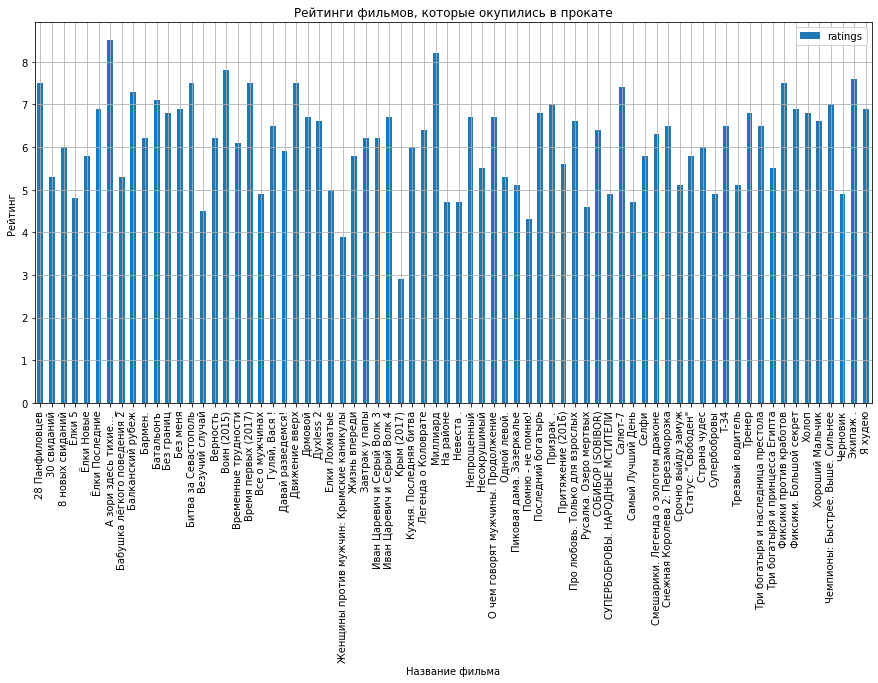

In [76]:
#построим столбчатую диаграмму с рейтингами фильмов, которые окупились
(
    gov_support_movies.query('box_office > budget & ratings != 0')
                      .pivot_table(index='title', values='ratings')
                      .plot(kind='bar', grid=True, figsize=(15,7))
)
plt.ylabel('Рейтинг')
plt.xlabel('Название фильма')
plt.title('Рейтинги фильмов, которые окупились в прокате')
plt.show()

**Вывод:** Рейтинги фильмов, которые окупились варьируются от 2.9 до 9.4. У большей части таких фильмов рейтинги находятся в диапазоне от 5.0 до 6.0. Фильмы с рейтингом ниже 5.0 могли не оправдать ожидания зрителей, тем не менее, если фильмы окупились, значит достаточное количество зрителей их посмотрело. Это могло быть связано с хорошей рекламной компанией, что привело к тому, что большое количество зрителей в первые дни премьеры покупали билеты.
Самым рейтинговым из фильмов, которые окупились, стал "А зори здесь тихие...". 

**Вывод по разделу:** У фильмов есть 3 источника госфинансирования фильмов: Министерство Культуры, Фонд кино и совместное финансирование - Министерство Культуры + Фонд кино. Видим, что фильмы, представленные в нашем датафрейме, получали господдержку с 2013 года и с каждым годом поддержка статистически увеличивалась. Лидером по госфинансированию является Фонд кино, Министерство культуры идет на 2 месте, общее финансирование - меньше всего. 

Увеличение с годами госфинансирования кинематографа связано с высоким уровнем поддержки государства, благодаря введенным Президентом РФ законам о поддержке кинематографа. В 2017 году снижение финансирования Министерством культуры может быть связано с проведенной Министерством реформой и ужесточением требований к получению финансирования, возможно в связи с этим увеличилась поддрежка со стороны Фонда кино.

В общей сложности в период с 2013 по 2019 годы Министерством культуры было выделенио почти 11,5 млрд рублей, Фондом кино - почти 30,4 млрд рублей, совместное финансирование - почти 2,7 млрд рублей. Суммарно государственное финансирование кинематографа с 2013 по 2019 годы составило 44,5 млрд рублей.

Из 332 фильмов, заручившихся госфинансированием, окупились 73, а не окупились - 259. В общем итоге, окупаемость таких фильмов составляет 22%. Что не такая уж большая цифра для потраченного на финансирование бюджета.
Больше всего финансирования было выделено для фильмов с жанре "драма. Меньше всего финансирования получили фильмы в жанре "реальное ТВ", но такой фильм всего один.

Окупились в прокате всего 3 жанра фильмов: спорт, комедии и ужасы. Можем предположить, что спортивные фильмы, комедии и ужасы вызывают у зрителей больший интерес. Фильмы с жанрами мюзикл, детектив, мелодрама и детские имеют самый меньший процент окупаемости. Видимо, такие жанры имеют самое меньшее количество заинтересованных зрителей.

Рейтинги фильмов, которые окупились варьируются от 2.9 до 9.4. У большей части таких фильмов рейтинги находятся в диапазоне от 5.0 до 6.0. Фильмы с рейтингом ниже 5.0 могли не оправдать ожидания зрителей, тем не менее, если фильмы окупились, значит достаточное количество зрителей их посмотрело. Это могло быть связано с хорошей рекламной компанией, что привело к тому, что большое количество зрителей в первые дни премьеры покупали билеты.
Самым рейтинговым из фильмов, которые окупились, стал "А зори здесь тихие...".

### Шаг 5. Напишите общий вывод

В данном исследовании мы изучили рынок российского кинопроката.

Для этого мы провели ознакомление с предоставленными нам данными. Обнаружили 2 посторонних значения. Произвели замену типа данных в столбце puNumber датасета mkrf_movies. По этому же столбцу и объединили наши датасеты.
Проверяя типы данных мы обнаружили, что в столбцах show_start_date и ratings типы данных не совпадают с ожидаемыми. Столбец show_start_date привели к типу данных datetime. В столбце со значениями рейтинга ситуация обстояла сложнее: мы обнаружили пропуски, которые заменили на 0, т.к. предположительно это фильмы, которые только вышли в прокат, и процентные значения, где мы брали обозначение процента "%", заменили тип данных на float и поделили эти процентные числа на 10, чтобы привести их к ожидаемому формату.

Пропуски наблюдались в столбцах puNumber, film_studio, production_country, director, producer, refundable_support, nonrefundable_support, budget, financing_source и genres. В столбце puNumber мы отбросили строку с пропуском, т.к. он был всего 1 и на исследование это не повлияет. В столбцах film_studio, production_country, director, producer и genres пропуски были заменены на "Студия не указана", "Страна не указана", "Режиссер не указан", "Продюсер не указан", "Жанр не указан" соответственно. В столбцах refundable_support, nonrefundable_support и budget пропуски заменим на 0, т.к. это фильмы, которые не получили государственной финансовой поддержки и, предположительно, финансировались из других источников. В столбце financing_source на место пропущенных источников финансирования можем поставить "Иное", т.к. мы предполагаем, что это негосударственные источники. В столбце box_office заменили пропуски на 0, т.к. такими данными мы не обладаем, а большую часть данных из датафрейма удалять нецелесообразно. Эти данные, если они имеются, можно уточнить у сотрудников или уточнить причину их отсутствия.

При поиске дубликатов, мы обнаружили 8 фильмов с одинаковыми названиями, но с разными прокатными удостоверениями. Удалять такие дубликаты мы не стали, т.к. фильмы могут получать несколько прокатных удостоверений для разного использования. Далее мы обнаружили 2 пары фльмов с одинаковыми номерами прокатных удостоверений, но разными названиями. Для обработки таких дублей у фильмов "Как жениться и остаться холостым." и "Анализируй это!" сделали допущение и заменили дублированные номера прокатных удостоверений на свободные. Номера прокатных удостоверений могли продублироваться в связи с тем, что фильм перезапускали, как в случае с фильмом "Как жениться и остаться холостым.", либо по ошибке, как в случае с фильмом "Анализируй это!". Данную информацию следует еще подробней уточнить у сотрудников.

Общей проблемой во всех столбцах с категоральными значениям было большое количество пропусков. В столбце type были найдены пробелы, которые мы впоследствие убрали, тем самым убрав неявные дубли значений. В столбце genres обратили внимание на большое количество ячеек с вариацией из нескольких жанров.

Проверяя количественные столбцы на аномалии выявили, что в столбце со сборами есть слишком маленькие нереальные значения, которые могут быть ошибкой в заполнении данных. В столбцах с возвратными, невозвратными средствами, бюджетом и рейтингом все данные могут быть вполне реальными, просто иметь большой разброс. Также были найдены 2 фильма с государственой поддержкой, но не имеющих сборов. Это могут быть фильмы, которые только вышли в прокат, либо данные об этих фильмах еще не обновлены. Так же нашли некоторое количество фильмов, у которых есть господдержка, но при этом бюджет у них 0. Эти данные мы заполнили, рассчитав медианный процент.

Для лучшего анализа мы добавили новые столбцы:
show_start_year - столбец с годом выхода фильма.
main_director - столбец с именем и фамилией главного режиссера. Для создания этого столбца выделили первое имя в столбце director, предположив, что именно первое имя является главным.
main_genre - столбец с названием главного жанра. Создавали столбец по тому же принципу, что и предыдущий.
gov_support_share - столбец с долей господдержки. Расчет доли произвели, сложив объем возвратных и невозвратных средств и, поделив сумму на общий бюджет. У тех фильмов, где доля равна 0% - господдержки не было.

В ходе исследования выявили следующие закономерности.

С 2010 по 2016 годы количество вышедших в прокат фильмов увеличивалось. В 2017 году произошел резкий спад. В 2019 году количество фильмов, вышедших в прокат, вернулось на прежний уровень 2016 года. Возможно, что резкий спад выхода фильмов в прокат был связан с новой реформой Министерства Культуры, которая предусматривает увеличение платы за выход фильмов в прокат и создание комиссии, которая решает, какие фильмы от этого взноса освободить.

Доля фильмов с информацией о выходе в прокат плавно увеличивалась с 2010 по 2014 годы, достигла своих пиков в 2015-2017 годах и немного снизилась с 2018 года. Можем предположить, что пики в 2015-2017 годах связаны с более качественными по содержанию кинопремьерами, которые допущены к прокату. Также это может быть связано с так называемым прорывом в российском кинематографе, что следует из многих статей. Спад в 2018-2019 годах может быть опять же связан с реформой 2017 года, описанной нами выше.
Полнее всего в данных представлен период с 2015 по 2019 года.

Сумма сборов начала резко увеличиваться с 2013 года, с 2016 года была примерно на одном уровне. Тем не менее минимальная сумма сборов зафиксирована в 2010 году, а максимальная в 2018 году. Это может быть связано с улучшением качества выпускаемых кинокартин.

Средняя сумма сборов намного больше, чем медианная. Это может говорить о том, что сумма сборов большей части фильмов невысокая, но также есть фильмы, которые были достаточно популярны у зрителей и принесли достаточно хорошую долю от проката.

В 2015 году лидерство по сборам было у фильмов "12+". К 2017 году лидерство перешло к фильмам "16+". В это время фильмы "12+" достигли своего минимума, это может быть связано с пересыщением ими рынка. Фильмы "6+" и "18+" с 2015 по 2019 годы имели одинаковую динамику, при этом фильмы "6+" имели большие сборы. к 2019 году фильмы "16+", "12+" и "6+" сравнялись по сумме сборов, фильмы "18+" расположились немного ниже. Все это время фильмы категории "0+" имели достаточно низкую сумму сборов и были в аутсайдерах. Получилось очень интересное распределение. Самый большой интерес у зрителей вызывали фильмы "16+", а самый низкий - фильмы "0+". Можем предположить, что это может быть связано с количеством фильмов, снятых по каждой категории.

Далее рассмотрели фильмы, заручившиеся государственной поддержкой. Установили следующие закономерности.

Всего фильмы финансируются тремя источниками: Министерство Культуры, Фонд кино и совместное финансирование - Министерство Культуры + Фонд кино. Видим, что фильмы, представленные в нашем датафрейме, получали господдержку с 2013 года и с каждым годом поддержка статистически увеличивалась. Лидером по госфинансированию является Фонд кино, Министерство культуры идет на 2 месте, общее финансирование - меньше всего. Финансирование Министерством культуры и общее снизилось в 2017 году и потом к 2019 году выросло вновь. Финансирование Фондом кино было как раз достаточно высоким, а к 2018 неким образом снизилось, но уже к 2019 году достигло своего пика. Динамика совместного финансирования Министерства Культуры с Фондом кино оставалось на низком уровне, с 2013 по 2015 года увеличивалось, в 2015 году достигла пика и к 2017 резко снизилось, далее незначительно увеличилось к 2019 году.

Увеличение с годами госфинансирования кинематографа связано с высоким уровнем поддержки государства, благодаря введенным Президентом РФ законам о поддержке кинематографа. В 2017 году снижение финансирования Министерством культуры может быть связано с проведенной Министерством реформой и ужесточением требований к получению финансирования, возможно в связи с этим увеличилась поддрежка со стороны Фонда кино.

В общей сложности в период с 2013 по 2019 годы Министерством культуры было выделенио почти 11,5 млрд рублей, Фондом кино - почти 30,4 млрд рублей, совместное финансирование - почти 2,7 млрд рублей, в качестве господдержки фильмов. Суммарно государственное финансирование кинематографа с 2013 по 2019 годы составило 44,5 млрд рублей.

Из 332 фильмов, заручившихся госфинансированием, окупились 73, а не окупились - 259. В общем итоге, окупаемость таких фильмов составляет 22%. Что не такая уж большая цифра для протраченного на финансирование бюджета.

Больше всего финансирования было выделено для фильмов с жанре "драма", при этом за весь период исследования их было снято больше всего - 93 фильма. Комедии стоят на втором месте по выделенному бюджеты, снято их 74 штуки. На третьем месте идут мультфильмы и количество их 31.

Меньше всего финансирования получили фильмы в жанре "реальное ТВ", но такой фильм всего один.

Исходя из процента окупаемости, окупились в прокате всего 3 жанра фильмов: спорт, комедии и ужасы. Можно предположить, что спортивные фильмы, комедии и ужасы вызывают у зрителей больший интерес.
Фильмы с жанрами мюзикл, детектив, мелодрама и детские имеют самый меньший процент окупаемости. Видимо, такие жанры имеют самое меньшее количество заинтересованных зрителей.

Рейтинги фильмов, которые окупились варьируются от 2.9 до 9.4. У большей части таких фильмов рейтинги находятся в диапазоне от 5.0 до 6.0. Есть фильмы с рейтингом ниже 5.0. Фильмы с рейтингом ниже 5.0 могли не оправдать ожидания зрителей, тем не менее, если фильмы окупились, значит достаточное количество зрителей их посмотрело. Это могло быть связано с хорошей рекламной компанией, что привело к тому, что большое количество зрителей в первые дни премьеры покупали билеты. Самым рейтинговым из фильмов, которые окупились, стал "А зори здесь тихие...".

Также хочется дополнить, что, несмотря на то, что не так много фильмов, заручившихся господдержкой, окупаются в прокате, государственное финансирование отечественного кинематографа **несомненно** стоит продолжать. Выбирая фильмы для финансирования, государственным источникам стоит обратить внимание на фильмы в тех жанрах, которые интересуют зрителя больше всего, а именно спортивные фильмы, комедии и ужасы. Также государственным источникам необходимо учитывать и содержание сюжета фильма, который они собираются взять на господдержку.